# Loading, preparing, cleaning DATA

In [63]:
import pandas as pd

#MORTGAGE30US.csv => Mortgage interest rates (weekly)
#RRVRUSQ156N.csv => Rental vacancy rates (quarterly)
#CPIAUCSL.csv => Inflation (monthly)
fedFiles = ["data/MORTGAGE30US.csv", "data/RRVRUSQ156N.csv", "data/CPIAUCSL.csv"]

#list comprehension
dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fedFiles]

In [64]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [65]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [66]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [67]:
#Concat les 3 pour qu'ils soient dans le meme data frame
fedData = pd.concat(dfs, axis=1)

In [68]:
fedData.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,NaN,NaN,278.524
2021-11-04,3.09,NaN,NaN
2021-11-10,2.98,NaN,NaN
2021-11-18,3.10,NaN,NaN
2021-11-24,3.10,NaN,NaN
2021-12-01,NaN,NaN,280.126
2021-12-02,3.11,NaN,NaN
2021-12-09,3.10,NaN,NaN
2021-12-16,3.12,NaN,NaN


In [69]:
#Ici on remplace les NaN par les valeur precedente constante
fedData = fedData.ffill()

In [70]:
fedData.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,3.14,5.6,278.524
2021-11-04,3.09,5.6,278.524
2021-11-10,2.98,5.6,278.524
2021-11-18,3.10,5.6,278.524
2021-11-24,3.10,5.6,278.524
2021-12-01,3.10,5.6,280.126
2021-12-02,3.11,5.6,280.126
2021-12-09,3.10,5.6,280.126
2021-12-16,3.12,5.6,280.126


In [71]:
zillowFiles = ["data/Metro_median_sale_price_uc_sfrcondo_week.csv", "data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillowFiles]

In [72]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [73]:
#Ici on enleve les 5 premieres colonnes pour seulement avoir les colonnes contenant les donnees
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]

In [74]:
dfs[1]

,0
1996-01-31,108641.264685
1996-02-29,108472.72888
1996-03-31,108532.280074
1996-04-30,108739.077466
1996-05-31,108986.621607
...,...
2022-03-31,344042.433111
2022-04-30,350515.841789
2022-05-31,354717.722904
2022-06-30,357473.327397


In [75]:
#Ici on ajoute une colonne commune aux 2 dataframes
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [76]:
dfs[0]

,0,month
2008-02-02,190000.0,2008-02
2008-02-09,190000.0,2008-02
2008-02-16,193000.0,2008-02
2008-02-23,189900.0,2008-02
2008-03-01,194900.0,2008-03
...,...,...
2022-06-11,370000.0,2022-06
2022-06-18,375000.0,2022-06
2022-06-25,370000.0,2022-06
2022-07-02,370000.0,2022-07


In [77]:
#Ici on merge les 2 dataframes sur la colonne commune
priceData = dfs[0].merge(dfs[1], on="month")

In [78]:
priceData.index = dfs[0].index

In [79]:
priceData

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [80]:
#Ici on enleve la colonne commune et on renome les colonnes
del priceData["month"]
priceData.columns = ["price", "value"]

In [81]:
priceData

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


In [82]:
#Ici on enleve les donnees avec NaN
fedData = fedData.dropna()

In [83]:
fedData.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-21,5.11,5.6,288.663
2022-04-28,5.10,5.6,288.663
2022-05-01,5.10,5.6,291.474
2022-05-05,5.27,5.6,291.474
2022-05-12,5.30,5.6,291.474
2022-05-19,5.25,5.6,291.474
2022-05-26,5.10,5.6,291.474
2022-06-01,5.10,5.6,295.328
2022-06-02,5.09,5.6,295.328


In [84]:
#Ici on ajoute 2 jours aux donnees pour pouvoir merge le zillowData
from datetime import timedelta
fedData.index = fedData.index + timedelta(days=2)

In [85]:
fedData

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271


In [86]:
priceData = fedData.merge(priceData, left_index=True, right_index=True)

In [87]:
priceData

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


In [88]:
priceData.columns = ["interest", "vacancy", "cpi", "price", "value"]

In [89]:
priceData

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


<Axes: >

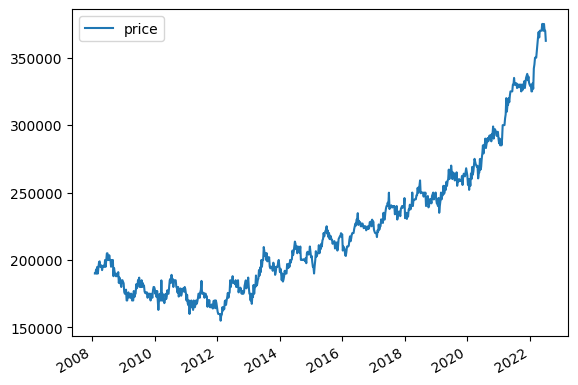

In [90]:
priceData.plot.line(y="price", use_index=True)

In [91]:
#adjPrice == price sans compter de l'inflation
priceData["adjPrice"] = priceData["price"] / priceData["cpi"] * 100

<Axes: >

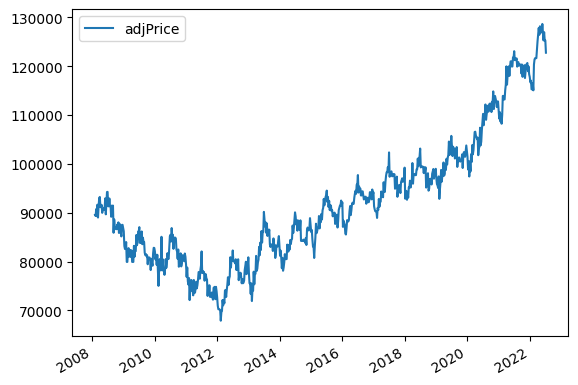

In [92]:
priceData.plot.line(y="adjPrice", use_index=True)

In [93]:
#adjValue == value sans compter de l'inflation
priceData["adjValue"] = priceData["value"] / priceData["cpi"] * 100

In [94]:
#Le prix de 3 mois dans le futur (-13 veut dire le nombre de rows)
priceData["nextQuarter"] = priceData["adjPrice"].shift(-13)

In [95]:
priceData

,interest,vacancy,cpi,price,value,adjPrice,adjValue,nextQuarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397,126977.462347,121042.815919,None
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636,125284.429516,120918.867035,None


In [96]:
priceData = priceData.dropna()

In [97]:
priceData

,interest,vacancy,cpi,price,value,adjPrice,adjValue,nextQuarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516


In [98]:
priceData["change"] = (priceData["nextQuarter"] > priceData["adjPrice"]).astype(int)

C:\Users\wilky.DESKTOP-L4543O3\AppData\Local\Temp\ipykernel_15352\2307573558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceData["change"] = (priceData["nextQuarter"] > priceData["adjPrice"]).astype(int)


In [99]:
priceData

,interest,vacancy,cpi,price,value,adjPrice,adjValue,nextQuarter,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1


In [100]:
#S'assurer que les valeurs sont balanced
priceData["change"].value_counts()

change
1    379
0    343
Name: count, dtype: int64

In [101]:
predictors = ["interest", "vacancy","adjPrice","adjValue"]
target = "change"

# Creating machine learning model

In [102]:
from sklearn.ensemble import RandomForestClassifier #learning model
from sklearn.metrics import accuracy_score #judging if model is accurate
import numpy as np

In [103]:
START = 260 #first 5 years of data
STEP = 52 #then will go on to the next years

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

#Do NOT use cross validation to train model for time series data because it'll use data from the future to predict the past. The model will look well trained but won't work well in real world applications.

#Ici on utilisera le backtesting
def backtest(data, predictors, target):
    allPreds = []
    for i in range(START, data.shape[0], STEP):
        train = priceData.iloc[:i] #Everything up until i
        test = priceData.iloc[i:(i+STEP)] #Year following i
        allPreds.append(predict(train, test, predictors, target))
        
    preds = np.concatenate(allPreds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [104]:
preds, accuracy = backtest(priceData, predictors, target)

In [105]:
accuracy #accurate 59% of the time

0.5952380952380952

In [106]:
yearly = priceData.rolling(52, min_periods=1).mean()

In [107]:
yearly #Average rates for the past year

,interest,vacancy,cpi,price,value,adjPrice,adjValue,nextQuarter,change
2008-02-02,5.680000,10.100000,212.174000,190000.000000,206885.853266,89549.143627,97507.636782,90610.014498,1.000000
2008-02-09,5.675000,10.100000,212.430500,190000.000000,206885.853266,89441.147580,97390.042811,90586.781161,1.000000
2008-02-16,5.690000,10.100000,212.516000,191000.000000,206885.853266,89875.323379,97350.844821,90729.433850,1.000000
2008-02-23,5.777500,10.100000,212.558750,190725.000000,206885.853266,89728.026056,97331.245826,90699.579012,1.000000
2008-03-01,5.870000,10.100000,212.584400,191560.000000,206600.587003,90109.822143,97185.361512,91146.332850,1.000000
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.115000,5.934615,274.619904,327174.057692,313200.591987,119132.562983,113969.580920,121263.755243,0.576923
2022-03-19,3.136923,5.915385,275.056058,328135.596154,314338.764087,119295.169360,114202.242187,121398.973432,0.576923
2022-03-26,3.163269,5.896154,275.492212,329193.288462,315476.936188,119491.196374,114434.903454,121501.633298,0.576923
2022-04-02,3.193654,5.876923,275.928365,330250.980769,316739.596917,119684.363389,114710.833809,121568.806147,0.576923


In [108]:
yearlyRatios = [p + "Year" for p in predictors]
priceData[yearlyRatios] = priceData[predictors] / yearly[predictors]

C:\Users\wilky.DESKTOP-L4543O3\AppData\Local\Temp\ipykernel_15352\1744179722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceData[yearlyRatios] = priceData[predictors] / yearly[predictors]
C:\Users\wilky.DESKTOP-L4543O3\AppData\Local\Temp\ipykernel_15352\1744179722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceData[yearlyRatios] = priceData[predictors] / yearly[predictors]
C:\Users\wilky.DESKTOP-L4543O3\AppData\Local\Temp\ipykernel_15352\1744179722.py:2: SettingWithCopyWarning: 
A value 

In [109]:
priceData

,interest,vacancy,cpi,price,value,adjPrice,adjValue,nextQuarter,change,interestYear,vacancyYear,adjPriceYear,adjValueYear
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1,0.999119,1.000000,0.998793,0.998793
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1,1.005272,1.000000,1.009662,0.999195
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1,1.045435,1.000000,0.995075,0.999396
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1,1.063032,1.000000,1.016948,0.993996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1,1.235955,0.977317,1.021141,1.049231
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1,1.326140,0.980494,1.019749,1.047093
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1,1.397289,0.983692,1.03262,1.044965
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1,1.462275,0.986911,1.045474,1.062065


In [110]:
preds, accuracy = backtest(priceData, predictors + yearlyRatios, target)

In [111]:
accuracy #improved from 59%

0.6536796536796536

In [112]:
predMatch = (preds == priceData[target].iloc[START:])

In [113]:
predMatch[predMatch == True] = "green"
predMatch[predMatch == False] = "red"

<Axes: xlabel='index', ylabel='adjPrice'>

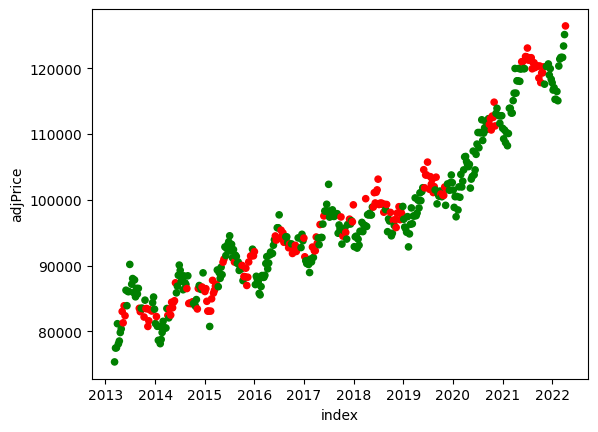

In [114]:
import matplotlib.pyplot as plt

plotData = priceData.iloc[START:].copy()

plotData.reset_index().plot.scatter(x="index", y="adjPrice", color=predMatch)

In [115]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(priceData[predictors], priceData[target])

result = permutation_importance(rf, priceData[predictors], priceData[target], n_repeats=10, random_state=1)

In [116]:
result["importances_mean"]
#Here, the higher the number, the more the model factored it in to make predictions

array([0.17451524, 0.15540166, 0.27576177, 0.34861496])

In [118]:
predictors

['interest', 'vacancy', 'adjPrice', 'adjValue']

# NEXT STEPS: Train other ML models using different algorithms